# EDA_FE 과제
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [13]:
df = pd.read_csv('airbnb_listings.csv', index_col=0)

C:\Users\user\AppData\Local\Temp\ipykernel_28140\577296706.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_listings.csv', index_col=0)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [14]:
# Q1
pd.set_option('display.max_columns', None)  # 모든 컬럼을 표시하도록 설정
df.head(5)

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,t,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",NaN,100,NaN,NaN,NaN,1,$0.00,1,730,t,30,60,90,365,1,0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,225,"$1,995.00",NaN,$350.00,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,89,$575.00,"$2,100.00",$500.00,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,200,NaN,NaN,$300.00,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",NaN,94,NaN,NaN,NaN,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [15]:
# Q2
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50796 entries, 0 to 50795
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_response_time                31790 non-null  object 
 2   host_response_rate                31790 non-null  object 
 3   host_acceptance_rate              36781 non-null  object 
 4   host_is_superhost                 50791 non-null  object 
 5   host_listings_count               50791 non-null  float64
 6   host_total_listings_count         50791 non-null  float64
 7   host_verifications                50791 non-null  object 
 8   host_has_profile_pic              50791 non-null  object 
 9   host_identity_verified            50791 non-null  object 
 10  neighborhood                      50796 non-null  object 
 11  latitude                          50796 non-null  float64
 12  longitude

In [16]:
# Q2
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_ratio = missing_values / len(df) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Ratio (%)': missing_ratio})
missing_data.sort_values(by='Missing Ratio (%)', ascending=False, inplace=True)
missing_data

,Missing Values,Missing Ratio (%)
jurisdiction_names,50781,99.970470
license,50759,99.927160
square_feet,50407,99.234192
monthly_price,46119,90.792582
weekly_price,45411,89.398772
host_response_rate,19006,37.416332
host_response_time,19006,37.416332
security_deposit,17325,34.107016
host_acceptance_rate,14015,27.590755
review_scores_value,11482,22.604142


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

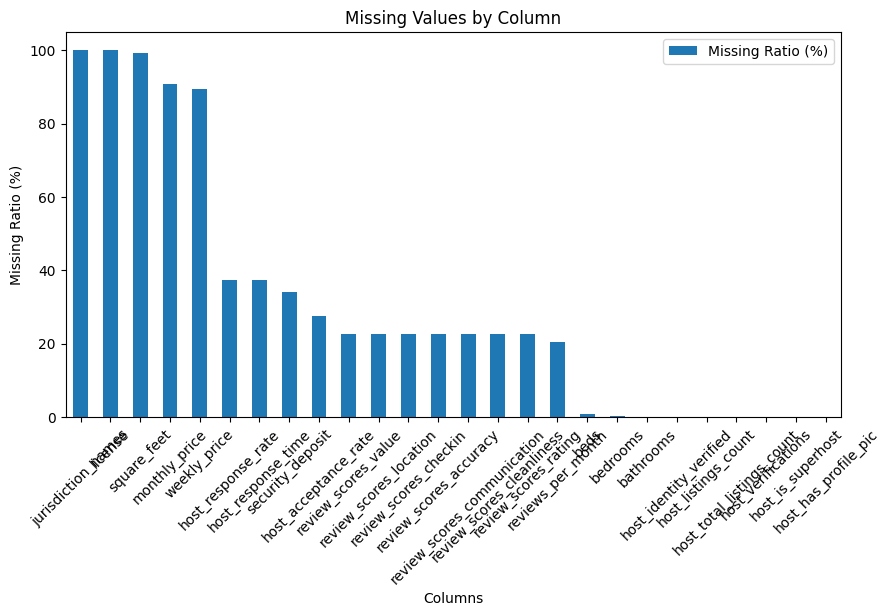

In [17]:
# Q3
missing_data.plot(kind='bar', y='Missing Ratio (%)', figsize=(10, 5))
plt.xlabel('Columns')
plt.ylabel('Missing Ratio (%)')
plt.title('Missing Values by Column')
plt.xticks(rotation=45)

plt.show()


- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다.
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [18]:
# Q4
df[df['beds'].isnull()].head(5)

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,Manhattan,40.70850,-74.01795,t,Apartment,Private room,2,NaN,1.0,NaN,Real Bed,{},NaN,150,$500.00,"$1,600.00",NaN,1,$0.00,1,1125,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Manhattan,40.72152,-73.99279,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,1300,NaN,NaN,NaN,1,$0.00,1,1125,t,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,Brooklyn,40.70528,-73.95756,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,190,NaN,NaN,$0.00,1,$100.00,1,218,t,30,60,90,365,1,0,NaN,10.0,8.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.77799,-73.95223,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,80,$700.00,"$3,000.00",NaN,1,$0.00,1,60,t,0,0,0,0,1,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,Brooklyn,40.71099,-73.95217,t,Apartment,Private room,1,1.0,1.0,NaN,Real Bed,{},NaN,48,NaN,NaN,NaN,1,$0.00,5,30,t,0,0,0,0,1,0,80.0,6.0,6.0,10.0,10.0,10.0,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [19]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [20]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50791 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room_type

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다.
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

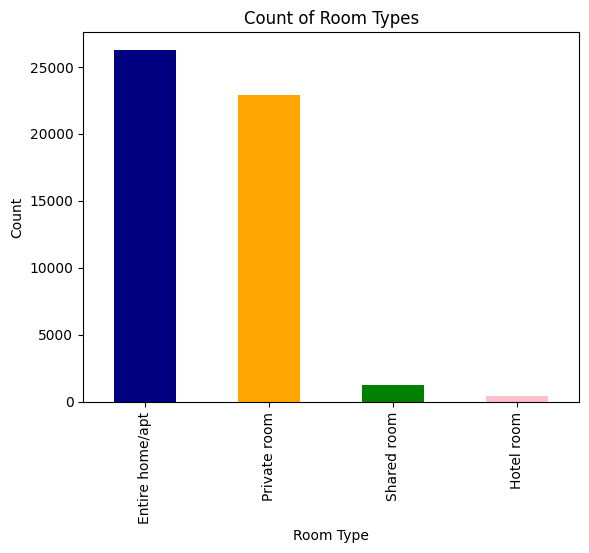

In [22]:
# Q5
room_type_counts = df['room_type'].value_counts()
colors = ['navy', 'orange', 'green', 'pink']  # Specify the colors for each bar
room_type_counts.plot(kind='bar', color=colors)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Count of Room Types')
plt.show()


- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

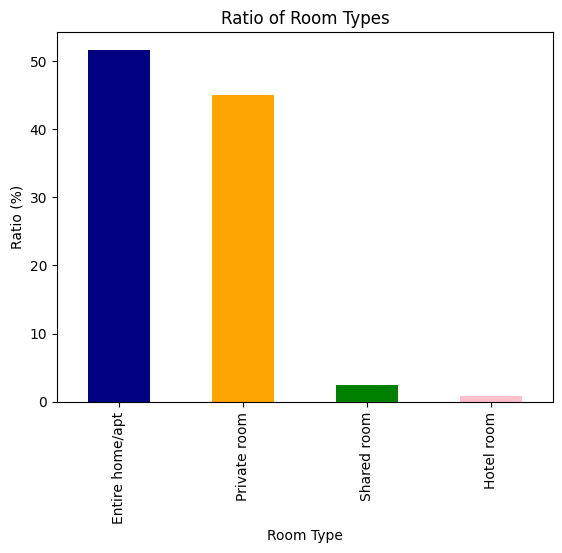

In [23]:
# Q6
room_type_ratio = room_type_counts / len(df) * 100
room_type_ratio.plot(kind='bar', color=colors)
plt.xlabel('Room Type')
plt.ylabel('Ratio (%)')
plt.title('Ratio of Room Types')
plt.show()



- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

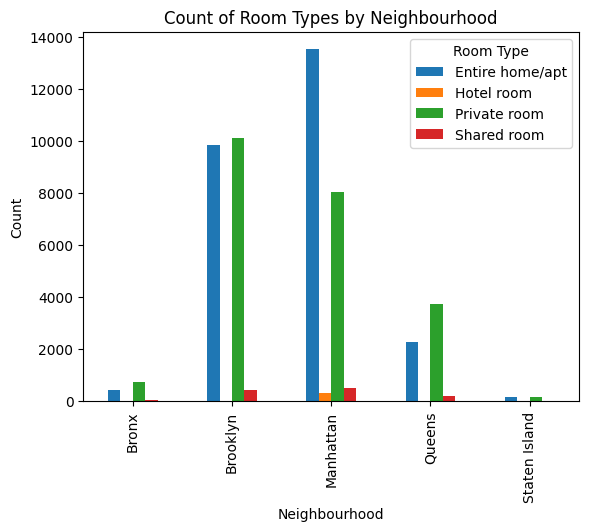

In [24]:
# Q7

room_type_counts_by_region = df.groupby('neighborhood')['room_type'].value_counts().unstack()
room_type_counts_by_region.plot(kind='bar')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Count of Room Types by Neighbourhood')
plt.legend(title='Room Type')
plt.show()


- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

C:\Users\user\AppData\Local\Temp\ipykernel_28140\487434427.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x='neighborhood', y='price', palette='Set2')  # Add palette='Set2' for colors


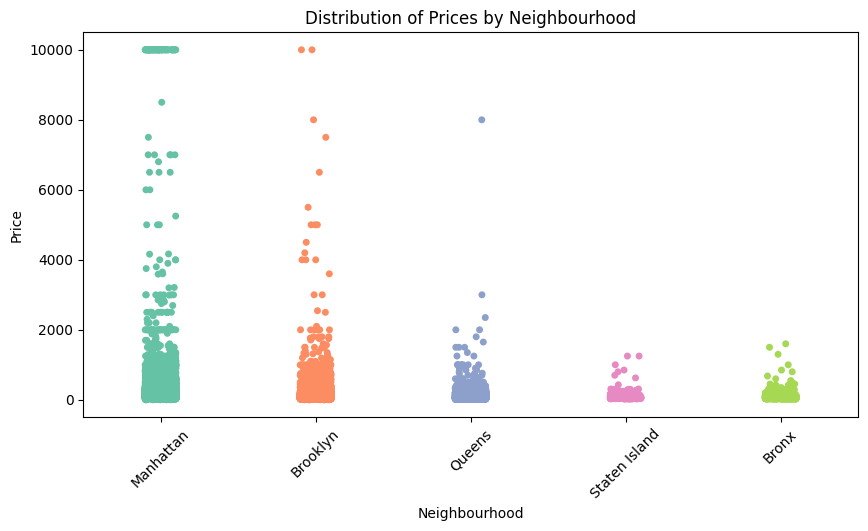

In [25]:
# Q8
# plt.figure() 여기부턴 직접 사이즈 조절해보세요
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
sns.stripplot(data=df, x='neighborhood', y='price', palette='Set2')  # Add palette='Set2' for colors
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Distribution of Prices by Neighbourhood')
plt.xticks(rotation=45)

plt.show()

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

In [26]:
# Q9

# entire home/apt와 home type의 private room type이 가장 수요가 많다.


- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

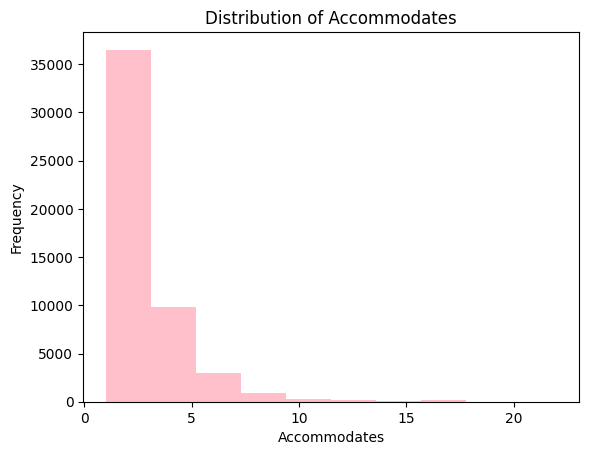

In [27]:
df['accommodates'].hist(color='pink', grid=True)
plt.xlabel('Accommodates')
plt.ylabel('Frequency')
plt.title('Distribution of Accommodates')
plt.grid(False)
plt.show()


- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

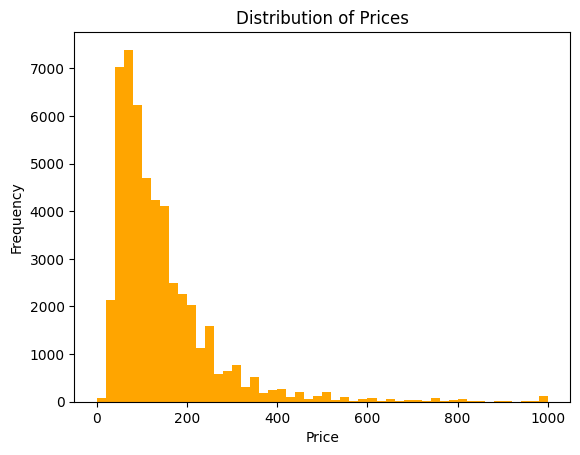

In [28]:
# Q11
plt.hist(df['price'], bins=50, range=(0, 1000), color='orange')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()


* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [29]:
df = pd.read_csv('./airbnb_listings.csv', index_col=0)

C:\Users\user\AppData\Local\Temp\ipykernel_28140\175951193.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./airbnb_listings.csv', index_col=0)


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [30]:

# 데이터 읽기
df = pd.read_csv('./airbnb_listings.csv', index_col=0, low_memory=False)  # low_memory=False를 추가하여 DtypeWarning 경고 메시지 무시

# 숫자로 변환할 수 있는 열에 대해 문자열을 제거하고 숫자로 변환
numeric_columns = ['host_response_rate', 'host_acceptance_rate', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'extra_people']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # errors='coerce'는 변환할 수 없는 값은 NaN으로 처리

# 결측값을 중간값(median)으로 대체
columns_to_fill = df.columns[df.isnull().mean() < 0.1]
for col in columns_to_fill:
    if df[col].dtype == 'O':  # 열이 문자열 인 경우
        df[col] = pd.to_numeric(df[col], errors='coerce')  # 문자열을 숫자로 변환
    df[col] = df[col].fillna(df[col].median())

# Drop columns with more than 25% missing values
columns_to_drop = df.columns[df.isnull().mean() >= 0.25]
df.drop(columns=columns_to_drop, inplace=True)

# Drop rows with 10% to 25% missing values
rows_to_drop = df.index[df.isnull().mean(axis=1) >= 0.1]
df.drop(index=rows_to_drop, inplace=True)


C:\Users\user\AppData\Roaming\Python\Python310\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\numpy\lib

- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [40]:
#Q13-1)
from sklearn.preprocessing import MinMaxScaler

# 선택한 변수들
scaling_columns = ['accommodates', 'price']

# Min-Max Scaling 진행
scaler = MinMaxScaler()
df[scaling_columns] = scaler.fit_transform(df[scaling_columns])

# 결과 출력
df.head()

#진행 이유 : 변수들 간 범위를 일치시키고 모델이 수렴하는 데 도움을 주기 위해

,id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
1,2595,6.0,6.0,40.75362,-73.98377,0.047619,1.0,0.0,1.0,0.0225,1,7,1125,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,0.38
2,3831,1.0,1.0,40.68514,-73.95976,0.095238,1.0,1.0,4.0,0.0089,1,1,730,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,4.71
3,5099,1.0,1.0,40.74767,-73.97500,0.047619,1.0,1.0,1.0,0.0200,2,3,21,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,0.59
4,5114,3.0,3.0,40.71910,-73.99040,0.047619,1.0,1.0,1.0,0.0094,1,1,730,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,0.56
5,5121,1.0,1.0,40.68688,-73.95596,0.047619,1.0,1.0,1.0,0.0060,1,29,730,30,60,90,365,50,1,90.0,8.0,8.0,10.0,10.0,9.0,9.0,0.38


In [41]:
#Q13-2)
# 리뷰 수와 리뷰 평점을 종합적인 지표로 활용하여 새로운 변수 생성
df['review_metric'] = df['number_of_reviews'] * df['review_scores_rating']

# 결과 출력
df[['number_of_reviews', 'review_scores_rating', 'review_metric']].head()


#데이터 전처리/새로운 특성 생성 : 리뷰수, 평점 등을 종합적 지표로 활용

,number_of_reviews,review_scores_rating,review_metric
1,48,94.0,4512.0
2,313,90.0,28170.0
3,78,90.0,7020.0
4,75,94.0,7050.0
5,50,90.0,4500.0


In [46]:
#Q13-3)
from sklearn.impute import SimpleImputer

# NaN 값을 해당 열의 평균값으로 대체
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# SelectKBest를 사용하여 통계적 방법으로 특성 선택
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X_imputed, y)

# 선택된 특성으로 이루어진 데이터프레임 생성
df_selected = pd.DataFrame(data=X_selected, columns=[f'feature_{i}' for i in range(X_selected.shape[1])])

# 결과 출력
print(df_selected.head())

#ANOVA 사용, price와 각 특성간의 통계적 관계 평가, 가장 중요한 5개의 특성 선택. 선택된 특성을 df_selected로 생성해서 결과 확인

   feature_0  feature_1  feature_2  feature_3  feature_4
0        6.0   0.047619   -0.33817  -1.567993  -0.490985
1        1.0   0.095238   -0.33817  -0.246401   2.083101
2        1.0   0.047619   -0.33817  -0.246401  -0.490985
3        3.0   0.047619   -0.33817  -0.246401  -0.490985
4        1.0   0.047619   -0.33817  -0.246401  -0.490985


---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요.
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가

</font>

* Q3 hint


<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
